# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [3]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [4]:
data = pd.read_csv('weight-height.csv')
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
male_df =  data.loc[data.Gender == 'Male']
female_df =  data.loc[data.Gender == 'Female']
female_df.head()

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

,Gender,Height,Weight
5000,Female,58.910732,102.088326
5001,Female,65.230013,141.305823
5002,Female,63.369004,131.041403
5003,Female,64.479997,128.171511
5004,Female,61.793096,129.781407


In [6]:
print(male_df.Height.mean())
print(male_df.Height.std())
print(male_df.Weight.mean())
print(male_df.Weight.std())


69.02634590621741
2.863362228660647
187.0206206581932
19.7811545167638


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

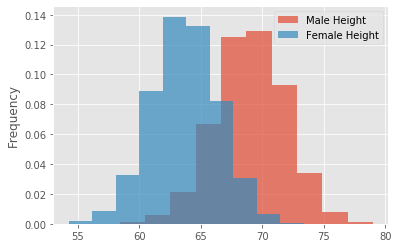

In [7]:
# Your code here
binsize = 10
male_df.Height.plot.hist(bins=binsize, density=True, alpha=0.7, label='Male Height')
female_df.Height.plot.hist(bins=binsize, density=True, alpha=0.7, label='Female Height')
plt.legend()
plt.show()

In [8]:
# Record your observations - are these inline with your personal observations?


## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

In [14]:
n, bins = np.histogram([1, 1, 1, 2, 3, 4, 6, 7, 8, 8, 8, 9],10)
print(n, bins)
print(n.size)

[3 1 1 1 0 0 1 1 3 1] [1.  1.8 2.6 3.4 4.2 5.  5.8 6.6 7.4 8.2 9. ]
10


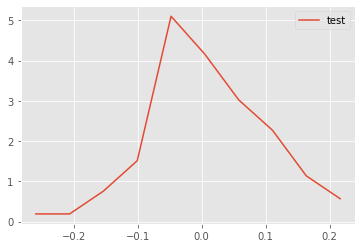

In [17]:
def density(x):
    n, bins = np.histogram(x,10, density = 1)
    #initialize numpy array with zero
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    
    # interpolate through histogram bins
    # identify middle point between twonaighbouring bins
    for k in range(n.size):
        pdfx[k] = .5 * (bins[k] + bins[k+1])
        pdfy[k] = n[k]
    
    #plot the calculated curve
    return pdfx, pdfy


#Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

## Add overlapping density plots to the histograms plotted earlier

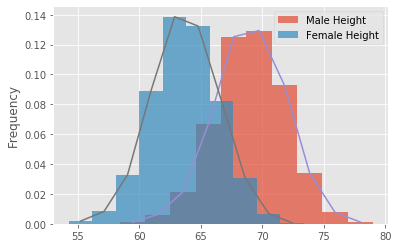

In [18]:
# Your code here 
binsize = 10
male_df.Height.plot.hist(bins=binsize, density=True, alpha=0.7, label='Male Height')
female_df.Height.plot.hist(bins=binsize, density=True, alpha=0.7, label='Female Height')
plt.legend()


x1, y1 = density(male_df.Height)
plt.plot(x1, y1)
x2, y2 = density(female_df.Height)
plt.plot(x2, y2)

plt.show()

## Repeat the above exercise for male and female weights

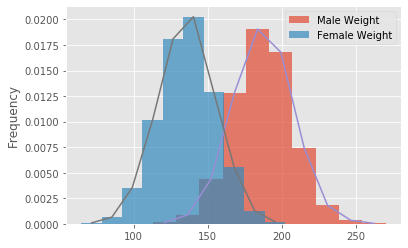

In [19]:
# Your code here 
binsize = 10
male_df.Weight.plot.hist(bins=binsize, density=True, alpha=0.7, label='Male Weight')
female_df.Weight.plot.hist(bins=binsize, density=True, alpha=0.7, label='Female Weight')
plt.legend()


x1, y1 = density(male_df.Weight)
plt.plot(x1, y1)
x2, y2 = density(female_df.Weight)
plt.plot(x2, y2)

plt.show()

## Write your observations in the cell below

In [25]:
# Record your observations - are these inline with your personal observations?


# What is the takeaway when comparing male and female heights and weights?

## Repeat the above experiments in seaborn and compare with your results

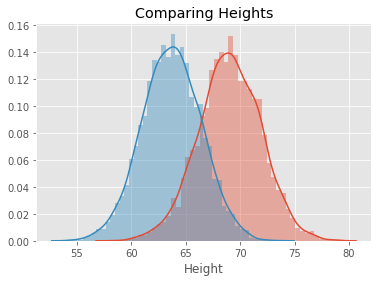

In [20]:
# Code for heights here
import seaborn as sns
sns.distplot(male_df.Height)
sns.distplot(female_df.Height)
plt.title('Comparing Heights')
plt.show()

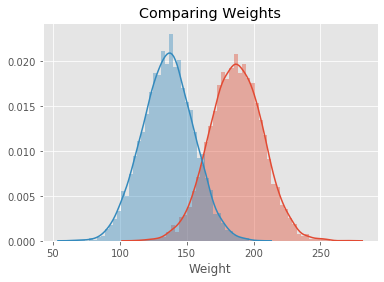

In [21]:
# Code for weights here
sns.distplot(male_df.Weight)
sns.distplot(female_df.Weight)
plt.title('Comparing Weights')
plt.show()

In [11]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.